# **Análise do Terreno na Terra Indígena SARARÉ**

## Contexto Geral

A ação de fiscalização realizada na Terra Indígena Sararé (TI Sararé), situada no município de Pontes e Lacerda (região Oeste do Mato Grosso), revela o elevado grau de devastação e os impactos socioambientais promovidos pelo garimpo ilegal.

### Situação detectada

* A partir de 1º de agosto de 2025, foi deflagrada uma operação integrada entre o Ibama, a Polícia Federal (PF), a Fundação Nacional dos Povos Indígenas (Funai) e outras forças de segurança, com o objetivo de expulsar garimpeiros que atuavam ilegalmente na TI Sararé.
* O Centro Gestor e Operacional do Sistema de Proteção da Amazônia (CENSIPAM) apoiou a operação com imagens de satélite e relatórios de inteligência, que juntamente com a Agência Brasileira de Inteligência (ABIN) subsidiaram as ações no interior da Terra Indígena Sararé.
* Na operação já foram destruídas cerca de 150 escavadeiras hidráulicas, resultando em um prejuízo estimado superior a **R$ 226 milhões** à atividade de garimpo ilegal.
* O território indígena, com aproximadamente 67 mil hectares, já teve mais de 3 mil hectares devastados pelo garimpo ilegal.
* Adicionalmente, relata-se que o garimpo ilegal nessa região está associado à presença de organizações criminosas, uso de armamento, confrontos com agentes públicos e forte degradação ambiental.

### Impactos relevantes

* Para as comunidades indígenas (no caso o povo Nambikwara), o garimpo significa perda de território, poluição dos rios, morte ou afastamento da fauna silvestre, destruição de plantas medicinais e redução na disponibilidade de alimento tradicional.
* Ambientalmente, a extração ilegal destrói cobertura vegetal, altera relevo e drenagens, bem como utiliza máquinas de grande porte, combustíveis, explosivos e sistemas de bombeamento que causam impacto irreversível no solo e na água.
* Operacionalmente, os garimpeiros frequentemente abandonam ou escondem equipamentos, inclusive escavadeiras, para evitar apreensão, o que gera indícios de que parte da frota pode estar enterrada ou soterrada — como é conhecido em algumas operações de garimpo que se buscam locais de descarte dos equipamentos ou esconderijo de maquinário.

### Justificativa da Proposta

Considerando esse panorama, emerge a proposta de aplicar técnicas geoespaciais para **identificar outras possíveis áreas compatíveis com a presença de escavadeiras enterradas ou escondidas**. A ideia é utilizar dados de elevação (DEM/DTM), imagens de satélite (órbita alta e média resolução, multiespectral), além de criar critérios de cenário (relevo favorável à ocultação, evidências de movimentação de máquinas, rastros de barragens ou áreas de pilha de rejeitos) para auxiliar na detecção de locais com probabilidade elevada de conter tais máquinas.

Essa abordagem integra três frentes:

1. **Relevo** — Locais com taludes, cortes, encostas, ou planícies próximas a rios onde máquinas podem ter sido descarregadas ou abandonadas;
2. **Visão de satélite** — Identificação de padrões de solo alterado, remoção de vegetação, traços de estrada ou estrutura de acampamento que indiquem presença de equipamento pesado;
3. **Validação e priorização** — Geração de ranking de “zonas de interesse” com base nas variáveis geoespaciais para posterior inspeção em campo ou com drone.

### Potencial benefício

* Aumentar a eficiência das ações de monitoramento e repressão ao garimpo ilegal em áreas remotas, reduzindo o custo de varredura de grandes áreas a partir de priorização geoespacial.
* Proporcionar suporte técnico à atuação de órgãos como Ibama, Funai e PF, com mapeamentos que podem embasar mandados, visualização de risco e logística de guarnições.
* Gerar evidências de possíveis depósitos ou escondidos de máquinas, o que pode levar à apreensão, responsabilização dos envolvidos e à restauração ambiental dos locais.

---

<p align="center">
  <img src="https://s2-oglobo.glbimg.com/Dc4KDJKwQTSnlkHBBgRRkQFJLS8%3D/0x21%3A924x640/888x0/smart/filters%3Astrip_icc%28%29/i.s3.glbimg.com/v1/AUTH_da025474c0c44edd99332dddb09cabe8/internal_photos/bs/2024/X/Z/Owv8sjTtOAhPXEfy4iMw/whatsapp-image-2024-08-22-at-14.28.59.jpeg" width="32%">
  <img src="https://midianinja.org/wp-content/uploads/2024/10/escavadeira-linkbelt-ti-sarare-ibama-gef-jpg.webp" width="32%">
  <img src="https://sumauma.com/wp-content/uploads/2023/11/abre_garimpo-1920x1248.jpg" width="32%">
</p>


## 🛰️ Passo 1: Obter o shapefile das Terras Indígenas (FUNAI)

O primeiro passo consiste em adquirir a base oficial das **Terras Indígenas (TIs)** disponibilizada pela **FUNAI**. Essa camada é essencial para delimitar corretamente a área de estudo — no caso, a **Terra Indígena Sararé**, localizada no município de Pontes e Lacerda (MT).

### 🔗 Fonte oficial

A FUNAI disponibiliza os dados geográficos das Terras Indígenas em seu portal institucional e também via **Infraestrutura Nacional de Dados Espaciais (INDE)** e **IBGE GeoFTP**.
Os links mais comuns são:

* [FUNAI – Dados geográficos oficiais](https://www.gov.br/funai/pt-br/centrais-de-conteudo/portal-geografico)
* [Download direto do shapefile (INDE / FUNAI)](https://www.gov.br/funai/pt-br/centrais-de-conteudo/portal-geografico/shape)
* Alternativamente, o arquivo pode ser baixado via [IBGE GeoFTP](https://geoftp.ibge.gov.br/informacoes_ambientais/territorio_indigena/), onde há versões atualizadas com projeção **SIRGAS 2000 / EPSG:4674**.

---

O atributo mais importante para filtragem é geralmente **`terrai_nom`**, que identifica a Terra Indígena. Outros campos úteis incluem:


| Campo            | Descrição                                                 |
| ---------------- | --------------------------------------------------------- |
| **`gid`**        | Identificador único do registro                           |
| **`terrai_cod`** | Código da Terra Indígena                                  |
| **`terrai_nom`** | Nome oficial da Terra Indígena                            |
| **`etnia_nome`** | Nome do povo indígena associado                           |
| **`municipio_`** | Município principal                                       |
| **`uf_sigla`**   | Unidade da Federação                                      |
| **`superficie`** | Área em hectares                                          |
| **`fase_ti`**    | Etapa jurídica (identificada, declarada, homologada etc.) |
| **`modalidade`** | Tipo de posse/gestão territorial                          |
| **`geometry`**   | Geometria do polígono da Terra Indígena                   |

---

In [1]:
import urllib.request
import zipfile
import os

from bqplot.pyplot import legend
from mpl_toolkits.mplot3d.art3d import pathpatch_2d_to_3d

# URL do shapefile das Terras Indígenas (FUNAI)
url_TI = (
    "https://geoserver.funai.gov.br/geoserver/Funai/ows?"
    "service=WFS&version=1.0.0&request=GetFeature&"
    "typeName=Funai%3Atis_poligonais&maxFeatures=10000&outputFormat=SHAPE-ZIP"
)

# Caminhos locais
zip_path = "TI_BRASIL.zip"
extract_path = "TI_BRASIL"

# Garantir que o diretório de destino exista
os.makedirs(extract_path, exist_ok=True)

print("🔽 Baixando shapefile das Terras Indígenas (FUNAI)...")

try:
    # Baixa o arquivo ZIP
    urllib.request.urlretrieve(url_TI, zip_path)
    print("✅ Download concluído!")

    # Extrai o conteúdo
    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"📦 Arquivos extraídos para: {extract_path}")

finally:
    # Remove o arquivo ZIP
    if os.path.exists(zip_path):
        os.remove(zip_path)
        print("🗑️ Arquivo ZIP removido com sucesso.")

🔽 Baixando shapefile das Terras Indígenas (FUNAI)...
✅ Download concluído!
📦 Arquivos extraídos para: TI_BRASIL
🗑️ Arquivo ZIP removido com sucesso.



## 🧭 Passo 2 – Obter o Modelo Digital de Elevação (DEM) e as Imagens Sentinel-2

### 🎯 Objetivo

Baixar dados geoespaciais essenciais da área da **Terra Indígena Sararé (MT)** para subsidiar análises de relevo, drenagem e cobertura do solo. Esses dados permitirão identificar padrões compatíveis com a presença de **máquinas enterradas** ou **áreas recentemente alteradas** pelo garimpo.



Cada tile de 10 m (GSD) é salvo individualmente, permitindo inspeções detalhadas por bloco.
O resultado esperado: **9 arquivos GeoTIFF** + 1 DEM Copernicus.


### ✅ Saída Final

| Arquivo                              | Conteúdo                   | Resolução |
| ------------------------------------ | -------------------------- | --------- |
| `Copernicus_DEM_TI_Sarare.tif`       | Modelo Digital de Elevação | 30 m      |
| `Sentinel2_RGB_TI_Sarare_mosaic.tif` | Mosaico RGB+NIR Sentinel-2 | 10 m      |



In [2]:
# ===============================================
# PASSO 2 — DOWNLOAD DO DEM E MOSAICO SENTINEL-2
# Terra Indígena Sararé (MT)
# ===============================================

import geemap
import ee
import geopandas as gpd
from shapely.geometry import mapping, box
import rasterio
from rasterio.merge import merge
import glob
import os
from datetime import datetime, timezone


# === INICIALIZAÇÃO DO EARTH ENGINE ===
ee.Initialize()

# === CONFIGURAÇÕES ===
NOME_TI = "Sararé"
out_dir = fr"{os.getcwd()}\Imagens_SARARE"
os.makedirs(out_dir, exist_ok=True)

# === CARREGAR GEOMETRIA ===
path_TI = r"TI_BRASIL/tis_poligonaisPolygon.shp"
gdf = gpd.read_file(path_TI)
TISAR = gdf[gdf["terrai_nom"].str.contains(NOME_TI, case=False, na=False)]
geom = TISAR.geometry.iloc[0]
ti_sarare = ee.Geometry(mapping(geom))
print("✅ Limite da TI Sararé carregado com sucesso!")

# === COPERNICUS DEM ===
copernicus = (
    ee.ImageCollection("COPERNICUS/DEM/GLO30")
    .filterBounds(ti_sarare)
    .mosaic()
    .clip(ti_sarare)
)
geemap.ee_export_image(
    copernicus,
    filename=os.path.join(out_dir, "Copernicus_DEM_TI_Sarare.tif"),
    region=ti_sarare,
    scale=30
)
print("💾 DEM exportado com sucesso!")

end_date = ee.Date(datetime.now(timezone.utc))
start_date = end_date.advance(-2, 'month')

# === SENTINEL-2 ===
sentinel = (
    ee.ImageCollection("COPERNICUS/S2_SR_HARMONIZED")
    .filterBounds(ti_sarare)
    .filterDate(start_date, end_date)
    .filter(ee.Filter.lt("CLOUDY_PIXEL_PERCENTAGE", 20))
    .median()
    .clip(ti_sarare)
    .select(["B4", "B3", "B2", "B8"])
)

# === FUNÇÃO PARA SUBDIVIDIR A GEOMETRIA ===
def subdividir_geom(geom, ncols=4, nrows=4):
    minx, miny, maxx, maxy = geom.bounds
    dx = (maxx - minx) / ncols
    dy = (maxy - miny) / nrows
    boxes = []
    for i in range(ncols):
        for j in range(nrows):
            x1 = minx + i * dx
            y1 = miny + j * dy
            x2 = x1 + dx
            y2 = y1 + dy
            boxes.append(box(x1, y1, x2, y2))
    return boxes

# === EXPORTAR TILES SENTINEL-2 ===
tiles = subdividir_geom(geom)
print(f"📦 Exportando {len(tiles)} blocos Sentinel-2...")

for idx, tile in enumerate(tiles, 1):
    region = ee.Geometry(mapping(tile))
    out_path = os.path.join(out_dir, f"Sentinel2_RGB_TI_Sarare_tile_{idx}.tif")
    try:
        geemap.ee_export_image(
            sentinel,
            filename=out_path,
            region=region,
            scale=10,
            file_per_band=False
        )
        print(f"✅ Tile {idx} exportado: {out_path}")
    except Exception as e:
        print(f"⚠️ Erro no tile {idx}: {e}")

print("\n🧩 Criando mosaico final...")

# === MOSAICAR TODOS OS TILES ===
tifs = sorted(glob.glob(os.path.join(out_dir, "Sentinel2_RGB_TI_Sarare_tile_*.tif")))
src_files_to_mosaic = [rasterio.open(fp) for fp in tifs]
mosaic, out_trans = merge(src_files_to_mosaic)

# === METADADOS ===
out_meta = src_files_to_mosaic[0].meta.copy()
out_meta.update({
    "driver": "GTiff",
    "height": mosaic.shape[1],
    "width": mosaic.shape[2],
    "transform": out_trans
})

# === SALVAR MOSAICO FINAL ===
mosaic_path = os.path.join(out_dir, "Sentinel2_RGB_TI_Sarare_mosaic.tif")
with rasterio.open(mosaic_path, "w", **out_meta) as dest:
    dest.write(mosaic)

print(f"✅ Mosaico criado com sucesso: {mosaic_path}")

# === FECHAR ARQUIVOS ABERTOS ===
for src in src_files_to_mosaic:
    src.close()

# === LIMPAR TILES INTERMEDIÁRIOS ===
for fp in tifs:
    try:
        os.remove(fp)
    except Exception as e:
        print(f"⚠️ Não foi possível apagar {fp}: {e}")

print("🧹 Arquivos intermediários removidos.")
print("🏁 Processo finalizado com sucesso!")

✅ Limite da TI Sararé carregado com sucesso!
Generating URL ...
Please wait ...
Data downloaded to D:\WILLIAN\OneDrive\Documentos\5. Estudos\Aplicacoes_Geoespaciais\Imagens_SARARE\Copernicus_DEM_TI_Sarare.tif
💾 DEM exportado com sucesso!
📦 Exportando 16 blocos Sentinel-2...
Generating URL ...
Please wait ...
Data downloaded to D:\WILLIAN\OneDrive\Documentos\5. Estudos\Aplicacoes_Geoespaciais\Imagens_SARARE\Sentinel2_RGB_TI_Sarare_tile_1.tif
✅ Tile 1 exportado: D:\WILLIAN\OneDrive\Documentos\5. Estudos\Aplicacoes_Geoespaciais\Imagens_SARARE\Sentinel2_RGB_TI_Sarare_tile_1.tif
Generating URL ...
Please wait ...
Data downloaded to D:\WILLIAN\OneDrive\Documentos\5. Estudos\Aplicacoes_Geoespaciais\Imagens_SARARE\Sentinel2_RGB_TI_Sarare_tile_2.tif
✅ Tile 2 exportado: D:\WILLIAN\OneDrive\Documentos\5. Estudos\Aplicacoes_Geoespaciais\Imagens_SARARE\Sentinel2_RGB_TI_Sarare_tile_2.tif
Generating URL ...
Please wait ...
Data downloaded to D:\WILLIAN\OneDrive\Documentos\5. Estudos\Aplicacoes_Geoesp

## 🚧 Passo 3 – Importar as Rodovias e Ramais

### 🎯 Objetivo

Incorporar as camadas de **rodovias e ramais vicinais** dentro da área da **Terra Indígena Sararé** e seu entorno imediato.
Essas vias são relevantes para entender:

* **Rotas logísticas de entrada/saída** usadas no garimpo ilegal;
* **Proximidade de acessos** a áreas suspeitas (por exemplo, locais onde escavadeiras podem ter sido escondidas);
* **Planejamento operacional** para incursões e monitoramento em campo.

---

### ⚙️ Fontes de Dados Sugeridas

**Rodovias Federais e Estaduais (DNIT + IBGE):**

   * [DNIT Geoportal – Rodovias Federais](https://servicos.dnit.gov.br/planejamento/rodovias/)
   * [IBGE – Malha Rodoviária](https://geoftp.ibge.gov.br/informacoes_ambientais/malha_viaria/)

Eu não gostei muito dessas fontes, pois os dados estão desatualizados e incompletos. Então, optei por usar o [OpenStreetMap (OSM)](https://download.geofabrik.de/south-america/brazil.html) que podem ser baixados gratuitamente e são frequentemente atualizados pela comunidade. Uma sugestão é o [GeoFabrik](https://www.geofabrik.de/) que possui as camadas de rodovias em shapefile para download direto.

In [3]:
import urllib.request
import zipfile
import os

# URL do shapefile do OpenStreetMap - Região Centro Oeste do Brasil
url_OSM_CENTRO_OESTE = "https://download.geofabrik.de/south-america/brazil/centro-oeste-251106-free.shp.zip"

# Caminhos locais
zip_path = "OSM_Centro_Oeste.zip"
extract_path = "OSM_CENTRO_OESTE"

# Garantir que o diretório de destino exista
os.makedirs(extract_path, exist_ok=True)

print("🔽 Baixando shapefile do OpenStreetMap da Região do Centro Oeste...")

try:
    # Baixa o arquivo ZIP
    urllib.request.urlretrieve(url_OSM_CENTRO_OESTE, zip_path)
    print("✅ Download concluído!")

    # Extrai o conteúdo
    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"📦 Arquivos extraídos para: {extract_path}")

finally:
    # Remove o arquivo ZIP
    if os.path.exists(zip_path):
        os.remove(zip_path)
        print("🗑️ Arquivo ZIP removido com sucesso.")

🔽 Baixando shapefile do OpenStreetMap da Região do Centro Oeste...
✅ Download concluído!
📦 Arquivos extraídos para: OSM_CENTRO_OESTE
🗑️ Arquivo ZIP removido com sucesso.


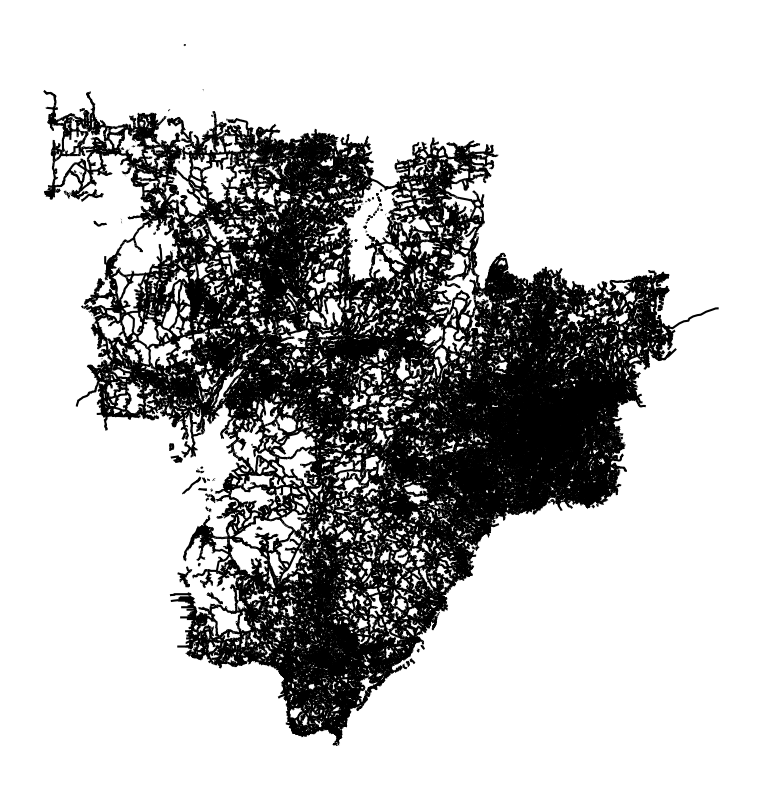

In [4]:
from matplotlib import pyplot as plt

path_Rodovia = "OSM_CENTRO_OESTE/gis_osm_roads_free_1.shp"
rodovias = gpd.read_file(path_Rodovia)
rodovias.plot(figsize=(10,10), edgecolor='black', legend=True, cmap='Set3')
plt.axis('off')
plt.show()

Outro aspecto importante é que o OSM inclui **ramais vicinais** e estradas não pavimentadas, que são cruciais para entender o acesso a áreas remotas como a TI Sararé, eu atualizei o `shapefile` para incluir esses ramais que eu já possuia em banco de dados local. No interior da Terra Indígena Sararé, esses ramais podem ser as únicas vias de acesso utilizadas por garimpeiros ilegais. E são vistos por satélite como trilhas ou estradas de terra. Dessa forma, com o uso do _Google Earth_ pode atualizar os ramais e estradas vicinais que não estão presentes no OpenStreetMap.

📏 Comprimento total dentro da TI Sararé (km):
fonte   compr_km
  OSM 113.227947
RAMAL 590.487184


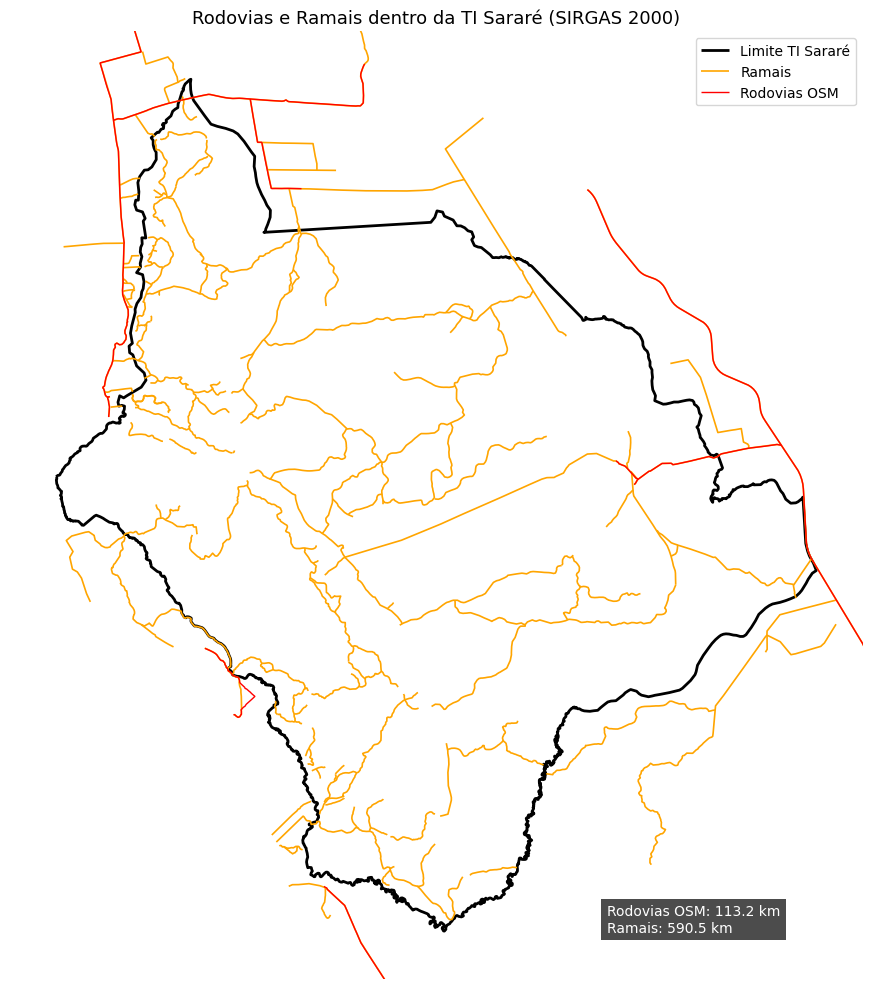


✅ Arquivos salvos na pasta 'RODOVIAS_RAMAIS':
 - D:\WILLIAN\OneDrive\Documentos\5. Estudos\Aplicacoes_Geoespaciais\RODOVIAS_RAMAIS\rodovias_ramais_TI_Sarare.gpkg
 - D:\WILLIAN\OneDrive\Documentos\5. Estudos\Aplicacoes_Geoespaciais\RODOVIAS_RAMAIS\rodovias_TI_Sarare.gpkg
 - D:\WILLIAN\OneDrive\Documentos\5. Estudos\Aplicacoes_Geoespaciais\RODOVIAS_RAMAIS\ramais_TI_Sarare.gpkg


In [5]:
# ======================================================================
# INTEGRAÇÃO DE RODOVIAS E RAMAIS NA TI SARARÉ
# Cria base vetorial integrada de vias para uso em análises geoespaciais
# ======================================================================

import os
import geopandas as gpd
import pandas as pd
from matplotlib import pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# --- Caminhos de entrada ---
path_ramal = "Files/ramais/ramais/ramais.shp"
path_rodovia = "OSM_CENTRO_OESTE/gis_osm_roads_free_1.shp"
path_ti = "TI_BRASIL/tis_poligonaisPolygon.shp"
NOME_TI = "Sararé"

# --- Carregar shapefiles ---
ramais = gpd.read_file(path_ramal)
rodovias = gpd.read_file(path_rodovia)
ti_brasil = gpd.read_file(path_ti)

# --- Selecionar apenas a Terra Indígena Sararé ---
ti_sarare = ti_brasil[ti_brasil["terrai_nom"] == NOME_TI]

# --- Garantir CRS consistente (SIRGAS 2000 - EPSG:4674) ---
target_crs = "EPSG:4674"

for gdf in [ramais, rodovias, ti_sarare]:
    if gdf.crs is None:
        gdf.set_crs(target_crs, inplace=True)
    elif gdf.crs.to_string() != target_crs:
        gdf.to_crs(target_crs, inplace=True)

# --- Adicionar coluna de origem ---
ramais["fonte"] = "RAMAL"
rodovias["fonte"] = "OSM"

# --- Harmonizar colunas ---
ramais = ramais.dropna(axis=1, how="all")
rodovias = rodovias.dropna(axis=1, how="all")

for col in rodovias.columns:
    if col not in ramais.columns:
        ramais[col] = None
for col in ramais.columns:
    if col not in rodovias.columns:
        rodovias[col] = None

# --- Concatenar camadas de rodovias e ramais ---
rede_viaria = gpd.GeoDataFrame(
    pd.concat([rodovias, ramais], ignore_index=True),
    crs=target_crs
)

# --- Criar buffer de 1 km ao redor da TI (projeção métrica) ---
ti_sarare_buffer = ti_sarare.to_crs(31981)  # UTM 21S - SIRGAS 2000
ti_sarare_buffer["geometry"] = ti_sarare_buffer.buffer(1000)
ti_sarare_buffer = ti_sarare_buffer.to_crs(4674)

# --- Selecionar vias que cruzam o buffer ---
rede_sarare = gpd.sjoin(rede_viaria, ti_sarare_buffer, predicate="intersects")

# --- Calcular comprimento em quilômetros ---
rede_sarare_utm = rede_sarare.to_crs(31981)
rede_sarare_utm["compr_km"] = rede_sarare_utm.length / 1000

# --- Estatísticas por tipo de fonte ---
estat = rede_sarare_utm.groupby("fonte")["compr_km"].sum().reset_index()
print("📏 Comprimento total dentro da TI Sararé (km):")
print(estat.to_string(index=False))

# --- Plotagem ---
fig, ax = plt.subplots(figsize=(10, 10))
ti_sarare.boundary.plot(ax=ax, color="black", linewidth=2, label="Limite TI Sararé")
rede_sarare[rede_sarare["fonte"] == "RAMAL"].plot(
    ax=ax, color="orange", linewidth=1.2, label="Ramais"
)
rede_sarare[rede_sarare["fonte"] == "OSM"].plot(
    ax=ax, color="red", linewidth=1, label="Rodovias OSM"
)

# --- Zoom automático ---
buffer_margin = 0.02
bounds = ti_sarare.total_bounds
ax.set_xlim(bounds[0] - buffer_margin, bounds[2] + buffer_margin)
ax.set_ylim(bounds[1] - buffer_margin, bounds[3] + buffer_margin)

# --- Anotação com totais ---
total_osm = estat.loc[estat["fonte"] == "OSM", "compr_km"].sum()
total_ram = estat.loc[estat["fonte"] == "RAMAL", "compr_km"].sum()

plt.text(
    0.70, 0.05,
    f"Rodovias OSM: {total_osm:.1f} km\nRamais: {total_ram:.1f} km",
    transform=ax.transAxes,
    fontsize=10, color="white",
    bbox=dict(facecolor="black", alpha=0.7, edgecolor="none")
)

plt.legend()
plt.title("Rodovias e Ramais dentro da TI Sararé (SIRGAS 2000)", fontsize=13)
plt.axis("off")
plt.tight_layout()
plt.show()

# --- Criar pasta de saída ---
output_dir = os.path.join(os.getcwd(), "RODOVIAS_RAMAIS")
os.makedirs(output_dir, exist_ok=True)

# --- Caminhos de saída ---
path_gpkg_all = os.path.join(output_dir, "rodovias_ramais_TI_Sarare.gpkg")
path_gpkg_osm = os.path.join(output_dir, "rodovias_TI_Sarare.gpkg")
path_gpkg_ram = os.path.join(output_dir, "ramais_TI_Sarare.gpkg")

# --- Exportar arquivos ---
rede_sarare_utm.to_file(path_gpkg_all, driver="GPKG")
rede_sarare_utm[rede_sarare_utm["fonte"] == "OSM"].to_file(path_gpkg_osm, driver="GPKG")
rede_sarare_utm[rede_sarare_utm["fonte"] == "RAMAL"].to_file(path_gpkg_ram, driver="GPKG")

print("\n✅ Arquivos salvos na pasta 'RODOVIAS_RAMAIS':")
print(f" - {path_gpkg_all}")
print(f" - {path_gpkg_osm}")
print(f" - {path_gpkg_ram}")


---

Embora as rodovias representadas no mapa não correspondam exatamente às vias oficiais — o que seria possível corrigir utilizando bases do DNIT — essa etapa seria um esforço desnecessário para o propósito atual da análise. O que importa é que a base utilizada oferece uma boa representação da malha de rodovias e ramais vicinais existentes na região da Terra Indígena Sararé.

A partir do mapa, observa-se uma **oferta significativa de ramais vicinais no interior da TI Sararé**, o que sugere a **existência de acessos terrestres possivelmente utilizados por garimpeiros ilegais**. Esses ramais desempenham um papel fundamental para compreender a **logística do garimpo** na área e podem indicar **zonas prioritárias para inspeção e monitoramento em campo**.

---


## **🌎 Passo 4 – Análise do Relevo, da Cobertura Vegetal e da Presença de Água na TI Sararé**

A análise integrada do relevo, da cobertura vegetal e da hidrografia dentro dos limites da Terra Indígena Sararé constitui um elemento essencial para a compreensão da dinâmica ambiental e operacional dessa região. Esses fatores físicos condicionam tanto a ocupação humana quanto a viabilidade de acesso terrestre e fluvial, sendo determinantes na identificação de áreas suscetíveis a pressões antrópicas, como o garimpo ilegal.

### **4.1 Relevo**

O modelo digital de elevação (MDE) derivado do **Copernicus DEM** foi utilizado para representar o relevo da TI Sararé. A topografia é caracterizada por **altitudes moderadas**, variando predominantemente entre **200 e 400 metros**, com relevo suavemente ondulado e presença de alguns patamares residuais. Essa configuração favorece a abertura de vias de acesso e a implantação de pequenas estruturas em áreas de menor declividade, especialmente nas porções centrais e norte da TI.

Os trechos de maior variação altimétrica concentram-se ao sul e sudoeste, próximos às transições para áreas serranas, que funcionam como **barreiras naturais** ao deslocamento terrestre. Essa informação é relevante para planejar rotas de inspeção e prever áreas com maior dificuldade logística para operações em campo.

### **4.2 Cobertura de Vegetação**

A partir de imagens **Sentinel-2** foi calculado o **Índice de Vegetação por Diferença Normalizada (NDVI)**, que permite estimar o vigor da cobertura vegetal. Observa-se que a maior parte da TI apresenta valores de NDVI elevados, compatíveis com **floresta densa e vegetação nativa preservada**. Contudo, em áreas próximas a ramais vicinais e nas porções centrais da TI, identificam-se manchas de **vegetação degradada e clareiras** que podem estar associadas à atividade garimpeira e à expansão de acampamentos.

Essas áreas de menor cobertura vegetal são prioritárias para verificação, pois podem indicar **processos recentes de desmatamento seletivo** ou **instalação de estruturas clandestinas**.

### **4.3 Presença de Água e Drenagem**

A análise da hidrografia, derivada do modelo de elevação e de composições espectrais (NDWI), evidencia uma rede de drenagem **densa e bem distribuída**, com predominância de pequenos cursos d’água e igarapés intermitentes. As principais drenagens seguem o padrão de relevo e convergem para o **rio Sararé**, que atua como eixo fluvial de importância regional.

A presença de corpos d’água rasos, associada à vegetação alterada, indica **áreas propícias à lavagem de minério e concentração de atividades de garimpo**. Esses pontos, quando cruzados com a malha viária e os padrões de relevo, configuram **zonas de interesse estratégico para inspeção e monitoramento remoto**.

### **4.4 Considerações Integradas**

O cruzamento dos três elementos – relevo, vegetação e hidrografia – permite inferir que a **porção central e nordeste da TI Sararé** apresenta **maior probabilidade de ocupação e atividade antrópica**, dadas as condições favoráveis de acesso, relevo suave e proximidade de recursos hídricos. Essa análise fornece subsídios diretos para o **planejamento de missões de fiscalização e priorização de áreas de observação por sensoriamento remoto**.


✅ Raster de relevo salvo com sucesso: D:\WILLIAN\OneDrive\Documentos\5. Estudos\Aplicacoes_Geoespaciais\Analise_SARARE\DEM_Sarare.tif


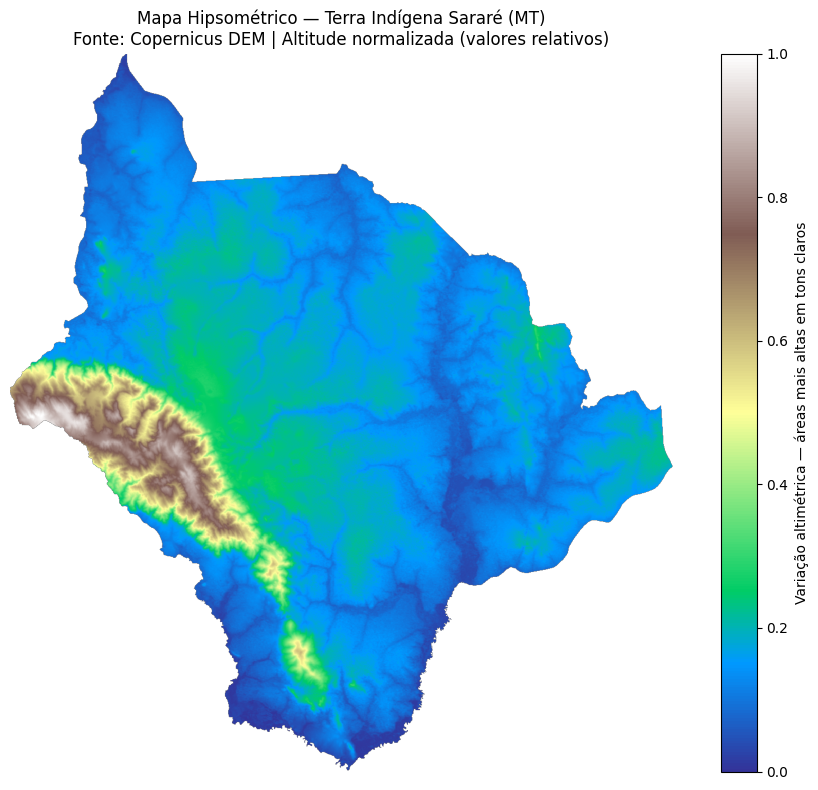

In [16]:
# PASSO 4 — ANÁLISE DO RELEVO, VEGETAÇÃO E ÁGUA
# Terra Indígena Sararé (MT)
# ===============================================

import os
import numpy as np
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import MinMaxScaler

# --- Configurações ---
out_dir = fr"{os.getcwd()}\Analise_SARARE"
os.makedirs(out_dir, exist_ok=True)
path_dem = fr"{os.getcwd()}\Imagens_SARARE\Copernicus_DEM_TI_Sarare.tif"
path_sentinel = fr"{os.getcwd()}\Imagens_SARARE\Sentinel2_RGB_TI_Sarare_mosaic.tif"
path_ti = fr"{os.getcwd()}\TI_BRASIL\tis_poligonaisPolygon.shp"
NOME_TI = "Sararé"

# --- Carregar limite da TI ---
ti = gpd.read_file(path_ti)
ti_sarare = ti[ti["terrai_nom"] == NOME_TI]
ti_sarare = ti_sarare.to_crs("EPSG:4326")

# --- Função auxiliar para mascarar rasters ---
def mask_raster(raster_path, shape_gdf):
    with rasterio.open(raster_path) as src:
        out_image, out_transform = mask(src, shape_gdf.geometry, crop=True)
        out_meta = src.meta.copy()
        out_meta.update({
            "driver": "GTiff",
            "height": out_image.shape[1],
            "width": out_image.shape[2],
            "transform": out_transform
        })
    return out_image, out_meta

# --- 4.1 RELEVO (MDE / Copernicus DEM) ---
dem, dem_meta = mask_raster(path_dem, ti_sarare)

# Se houver várias bandas, pega apenas a primeira
if dem.shape[0] > 1:
    dem_data = dem[0, :, :].astype(float)
else:
    dem_data = dem.squeeze().astype(float)

dem_data[dem_data <= 0] = np.nan  # remover valores nulos

# --- 💾 Salvar o DEM recortado para uso no Passo 5 ---
dem_meta.update({
    "driver": "GTiff",
    "count": 1,
    "dtype": "float32"
})
dem_out_path = os.path.join(out_dir, "DEM_Sarare.tif")

with rasterio.open(dem_out_path, "w", **dem_meta) as dst:
    dst.write(dem_data.astype("float32"), 1)

print(f"✅ Raster de relevo salvo com sucesso: {dem_out_path}")

# Normalização para colorização
scaler = MinMaxScaler()
vals = dem_data[~np.isnan(dem_data)].reshape(-1, 1)
dem_norm = scaler.fit_transform(vals).flatten()
dem_data[~np.isnan(dem_data)] = dem_norm

# Plot hipsométrico
plt.figure(figsize=(10, 8))
plt.title(
    "Mapa Hipsométrico — Terra Indígena Sararé (MT)\n"
    "Fonte: Copernicus DEM | Altitude normalizada (valores relativos)",
    fontsize=12
)
plt.imshow(dem_data, cmap="terrain")
plt.colorbar(label="Variação altimétrica — áreas mais altas em tons claros")
plt.axis("off")
plt.tight_layout()
plt.savefig(os.path.join(out_dir, "Relevo_Sarare_DEM.png"), dpi=300)
plt.show()


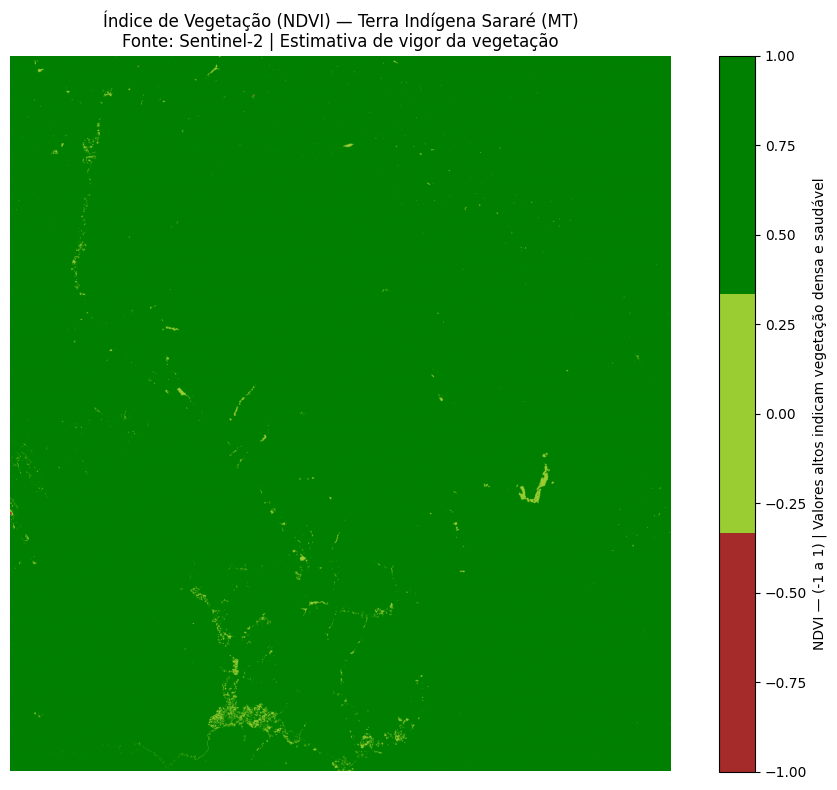

In [7]:
# --- 4.2 COBERTURA VEGETAL (NDVI) ---
# Sentinel-2: bandas [B4 = Red, B8 = NIR]
with rasterio.open(path_sentinel) as src:
    red = src.read(3).astype(float)  # banda 4 (índice 3, pois indexa de 0)
    nir = src.read(4).astype(float)  # banda 8 (índice 4)

# Calcular NDVI
ndvi = (nir - red) / (nir + red)
ndvi = np.clip(ndvi, -1, 1)

# Paleta para NDVI
ndvi_cmap = ListedColormap(["brown", "yellowgreen", "green"])

plt.figure(figsize=(10, 8))
plt.title(
    "Índice de Vegetação (NDVI) — Terra Indígena Sararé (MT)\n"
    "Fonte: Sentinel-2 | Estimativa de vigor da vegetação",
    fontsize=12)
plt.imshow(ndvi, cmap=ndvi_cmap, vmin=-1, vmax=1)
plt.colorbar(label="NDVI — (-1 a 1) | Valores altos indicam vegetação densa e saudável")
plt.axis("off")
plt.tight_layout()
plt.savefig(os.path.join(out_dir, "NDVI_Sarare.png"), dpi=300)
plt.show()

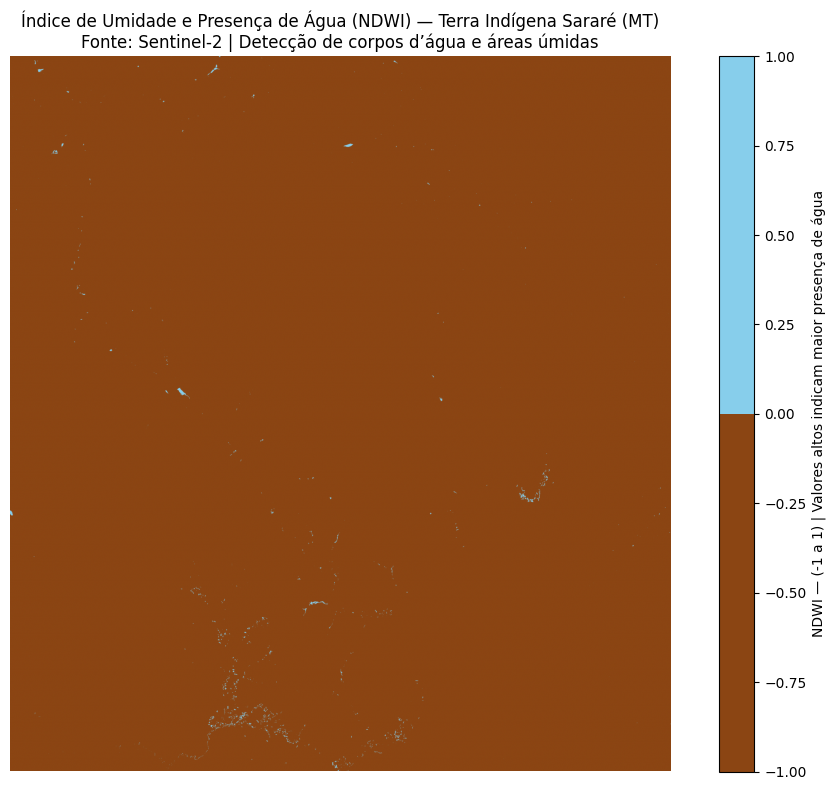

In [8]:
# --- 4.3 PRESENÇA DE ÁGUA (NDWI) ---
# Sentinel-2: bandas [B3 = Green, B8 = NIR]
with rasterio.open(path_sentinel) as src:
    green = src.read(2).astype(float)
    nir = src.read(4).astype(float)

ndwi = (green - nir) / (green + nir)
ndwi = np.clip(ndwi, -1, 1)

# Paleta para NDWI
ndwi_cmap = ListedColormap(["saddlebrown", "skyblue"])

plt.figure(figsize=(10, 8))
plt.title(
    "Índice de Umidade e Presença de Água (NDWI) — Terra Indígena Sararé (MT)\n"
    "Fonte: Sentinel-2 | Detecção de corpos d’água e áreas úmidas",
    fontsize=12
)
plt.imshow(ndwi, cmap=ndwi_cmap, vmin=-1, vmax=1)
plt.colorbar(label="NDWI — (-1 a 1) | Valores altos indicam maior presença de água")
plt.axis("off")
plt.tight_layout()
plt.savefig(os.path.join(out_dir, "NDWI_Sarare.png"), dpi=300)
plt.show()

In [9]:
# --- 4.4 EXPORTAR RASTERS CALCULADOS ---
# Salvar NDVI e NDWI como GeoTIFF
ndvi_path = os.path.join(out_dir, "NDVI_Sarare.tif")
ndwi_path = os.path.join(out_dir, "NDWI_Sarare.tif")

with rasterio.open(path_sentinel) as src:
    meta = src.meta.copy()
    meta.update({"count": 1, "dtype": "float32"})
    with rasterio.open(ndvi_path, "w", **meta) as dst:
        dst.write(ndvi.astype("float32"), 1)
    with rasterio.open(ndwi_path, "w", **meta) as dst:
        dst.write(ndwi.astype("float32"), 1)

print("✅ Análises concluídas e arquivos salvos em:", out_dir)


✅ Análises concluídas e arquivos salvos em: D:\WILLIAN\OneDrive\Documentos\5. Estudos\Aplicacoes_Geoespaciais\Analise_SARARE


---

### ⚠️ **Disclaimer – Limitações e Objetivo das Imagens Utilizadas**

As imagens empregadas nesta análise são provenientes de satélites de órbita alta, com **resolução espacial moderada (10 a 30 metros por pixel)**, obtidas a partir de bases de **dados abertos e gratuitos**.
É importante destacar que essas imagens podem não refletir com precisão as **alterações recentes no terreno**, sobretudo em regiões de **dinâmica intensa de garimpo ilegal**, devido à **baixa frequência de revisita** e à **defasagem temporal** entre as capturas.

No **CENSIPAM**, dispomos de **imagens de altíssima resolução e alta taxa de atualização**, que permitem análises mais detalhadas, precisas e em tempo quase real.
Entretanto, o propósito deste trabalho é **demonstrar uma metodologia replicável com dados públicos**, permitindo que qualquer interessado — instituição, pesquisador ou cidadão — possa **reproduzir ou adaptar o processo analítico** em outras áreas de interesse, utilizando ferramentas e dados **abertos, gratuitos e acessíveis**.

---

## 🟠 **PASSO 5 — Delimitação de Áreas de Interesse para Inspeção de Escavadeiras Ocultas**

### **Objetivo**

Identificar **zonas prioritárias de interesse** dentro da Terra Indígena Sararé (MT), considerando a combinação de fatores ambientais e logísticos que favorecem a **ocultação de maquinário pesado**, especialmente escavadeiras hidráulicas utilizadas em atividades de garimpo ilegal.

---

### **Metodologia Integrada**

A identificação das **Áreas de Interesse** resulta da integração de variáveis ambientais e logísticas obtidas nas etapas anteriores:

1. **Relevo favorável (≤ 5°):** derivado do Copernicus DEM, indicando terrenos planos propícios à movimentação de maquinário.
2. **Vegetação degradada (NDVI < 0.4):** reflete clareiras, solo exposto e indícios de intervenção humana recente.
3. **Proximidade hídrica (NDWI > 0.2):** aponta zonas úmidas ou cursos d’água utilizados no suporte a atividades garimpeiras.
4. **Acessibilidade (≤ 500 m de vias):** representa áreas com facilidade de acesso por ramais ou rodovias.
5. **Interseção de fatores:** a sobreposição dessas camadas define regiões com **maior potencial de ocorrência de atividades ilegais**, priorizando-as para inspeção.




---

ℹ️ Raster de declividade já existente, prosseguindo...
✅ Mapa refinado salvo: D:\WILLIAN\OneDrive\Documentos\5. Estudos\Aplicacoes_Geoespaciais\Analise_SARARE\Mapa_Areas_Interesse_Sarare.tif
📐 Raster reprojetado para CRS métrico: D:\WILLIAN\OneDrive\Documentos\5. Estudos\Aplicacoes_Geoespaciais\Analise_SARARE\Mapa_Areas_Interesse_Sarare_UTM.tif


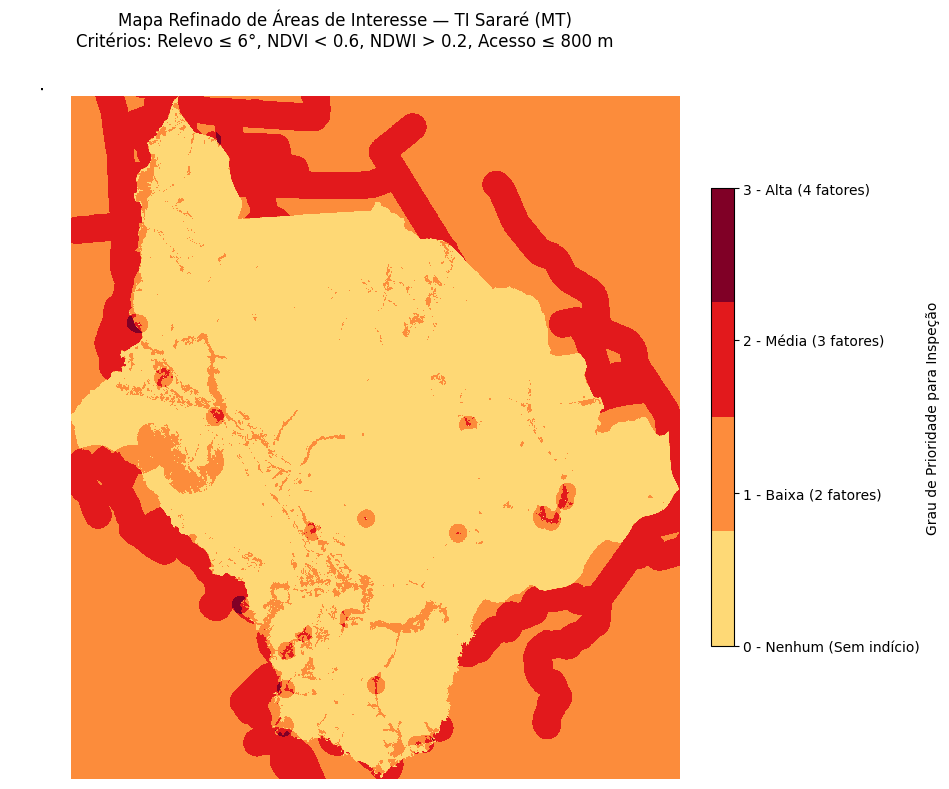

🗺️ Mapa refinado exportado com sucesso: D:\WILLIAN\OneDrive\Documentos\5. Estudos\Aplicacoes_Geoespaciais\Analise_SARARE\Mapa_Areas_Interesse_Sarare.png

📊 Estatísticas de Prioridade (com CRS métrico):
Prioridade | N° Pixels | Área (km²) | Percentual (%)
    0      |   749,671 |     650.81 |       45.7
    1      |   619,720 |     537.99 |       37.8
    2      |   269,403 |     233.87 |       16.4
    3      |     1,456 |       1.26 |        0.1

🌎 Área total analisada: 1423.94 km²

🧭 INTERPRETAÇÃO TÉCNICA:
O modelo integra múltiplos fatores ambientais e logísticos.
O relevo favorável (≤ 6°) foi derivado automaticamente do DEM e processado em memória.
Áreas com NDWI > 0.2 foram excluídas por representarem solos saturados.
Foi criado um buffer de 500 m em torno das zonas úmidas para incluir margens drenadas e várzeas.
As áreas de alta prioridade (3) reúnem terrenos planos, vegetação degradada e proximidade de vias,
caracterizando maior potencial de ocorrência de atividades garimpeiras.

In [42]:
# ========================================================================================
# PASSO 5 — MODELO INTEGRADO DE ÁREAS DE INTERESSE
# Integra relevo, vegetação degradada, acesso, entorno úmido e exclusão de áreas alagadas
# =======================================================================================

import os
import time
import gc
import numpy as np
import geopandas as gpd
import rasterio
from rasterio.mask import mask
from rasterio.features import rasterize, shapes
from rasterio.warp import reproject, Resampling, calculate_default_transform
from shapely.geometry import shape
import matplotlib.pyplot as plt
import matplotlib as mpl

# --- Parâmetros calibrados ---
LIMIAR_SLOPE = 6       # graus (relevo favorável)
LIMIAR_NDVI = 0.6      # degradação moderada
LIMIAR_NDWI = 0.2      # presença de umidade leve
LIMIAR_AGUA = 0.2      # corte para exclusão de áreas alagadas
BUFFER_VIAS = 800      # distância até vias (m)
BUFFER_UMIDO = 500     # distância de entorno de áreas úmidas (m)

# --- Caminhos de entrada e saída ---
base_dir = fr"{os.getcwd()}\Analise_SARARE"
path_ti = fr"{os.getcwd()}\TI_BRASIL\tis_poligonaisPolygon.shp"
path_ndvi = os.path.join(base_dir, "NDVI_Sarare.tif")
path_ndwi = os.path.join(base_dir, "NDWI_Sarare.tif")
path_dem = os.path.join(base_dir, "DEM_Sarare.tif")  # raster de elevação original
path_slope_raw = os.path.join(base_dir, "Slope_Sarare.tif")
path_viaria = fr"{os.getcwd()}\RODOVIAS_RAMAIS\rodovias_ramais_TI_Sarare.gpkg"
out_tif = os.path.join(base_dir, "Mapa_Areas_Interesse_Sarare.tif")
out_png = os.path.join(base_dir, "Mapa_Areas_Interesse_Sarare.png")
out_tif_metrico = os.path.join(base_dir, "Mapa_Areas_Interesse_Sarare_UTM.tif")

NOME_TI = "Sararé"

# =========================================================
# ETAPA 1 — CÁLCULO AUTOMÁTICO DO RASTER DE DECLIVIDADE
# =========================================================
if not os.path.exists(path_slope_raw):
    print("⚙️ Raster de declividade não encontrado. Gerando a partir do DEM...")

    with rasterio.open(path_dem) as src:
        dem = src.read(1).astype("float32")
        transform = src.transform
        meta = src.meta.copy()

        # --- Calcular gradiente (em metros) ---
        x, y = np.gradient(dem, transform[0], transform[4])

        # --- Tangente e conversão para graus ---
        slope_rad = np.arctan(np.sqrt(x**2 + y**2))
        slope_deg = np.degrees(slope_rad)

        meta.update({
            "dtype": "float32",
            "count": 1
        })

        with rasterio.open(path_slope_raw, "w", **meta) as dst:
            dst.write(slope_deg.astype("float32"), 1)

    print(f"✅ Declividade gerada com sucesso: {path_slope_raw}")
else:
    print("ℹ️ Raster de declividade já existente, prosseguindo...")

# =========================================================
# ETAPA 2 — GERAÇÃO DO RELEVO FAVORÁVEL (≤ 5°) EM MEMÓRIA
# =========================================================
def read_masked(path, shape):
    with rasterio.open(path) as src:
        arr, transform = mask(src, shape.geometry, crop=True)
        meta = src.meta.copy()
        meta.update({
            "height": arr.shape[1],
            "width": arr.shape[2],
            "transform": transform,
            "crs": src.crs
        })
    return arr[0], meta

# --- Carregar limite da Terra Indígena ---
ti = gpd.read_file(path_ti)
ti_sarare = ti[ti["terrai_nom"] == NOME_TI].to_crs("EPSG:4326")

# --- Relevo favorável ---
with rasterio.open(path_slope_raw) as src:
    slope_raw, transform = mask(src, ti_sarare.geometry, crop=True)
    meta_slope = src.meta.copy()
    meta_slope.update({
        "height": slope_raw.shape[1],
        "width": slope_raw.shape[2],
        "transform": transform,
        "crs": src.crs
    })

# Reclassificação em memória
slope = np.where(slope_raw[0] <= LIMIAR_SLOPE, 1, 0).astype("uint8")
meta_ref = meta_slope

# =========================================================
# ETAPA 3 — LEITURA DOS RASTERS NDVI E NDWI
# =========================================================
ndvi, meta_ndvi = read_masked(path_ndvi, ti_sarare)
ndwi, meta_ndwi = read_masked(path_ndwi, ti_sarare)

def align_to_ref(src_array, src_meta, ref_meta):
    aligned = np.empty((ref_meta["height"], ref_meta["width"]), dtype=src_array.dtype)
    reproject(
        source=src_array,
        destination=aligned,
        src_transform=src_meta["transform"],
        src_crs=src_meta["crs"],
        dst_transform=ref_meta["transform"],
        dst_crs=ref_meta["crs"],
        resampling=Resampling.bilinear
    )
    return aligned

ndvi_aligned = align_to_ref(ndvi, meta_ndvi, meta_ref)
ndwi_aligned = align_to_ref(ndwi, meta_ndwi, meta_ref)

# =========================================================
# ETAPA 4 — ACESSIBILIDADE E ÁREAS ÚMIDAS
# =========================================================
rodovias = gpd.read_file(path_viaria)
rodovias_m = rodovias.to_crs("EPSG:31981")  # UTM zone 21S
buffer_vias_m = rodovias_m.buffer(BUFFER_VIAS)
buffer_vias = gpd.GeoDataFrame(geometry=buffer_vias_m, crs="EPSG:31981").to_crs(meta_ref["crs"])

access_raster = rasterize(
    [(geom, 1) for geom in buffer_vias.geometry if geom is not None],
    out_shape=(meta_ref["height"], meta_ref["width"]),
    transform=meta_ref["transform"],
    fill=0,
    dtype="uint8"
)

# --- Reclassificação NDVI ---
ndvi_refined  = np.where(ndvi_aligned < LIMIAR_NDVI, 1, 0).astype("uint8")

# --- Identificação de áreas úmidas ---
mask_agua = ndwi_aligned > LIMIAR_AGUA
results = (
    {"properties": {"value": 1}, "geometry": shape(geom)}
    for geom, value in shapes(ndwi_aligned.astype("float32"), mask=mask_agua, transform=meta_ref["transform"])
)
gdf_agua = gpd.GeoDataFrame.from_features(list(results), crs=meta_ref["crs"])

if not gdf_agua.empty:
    gdf_agua_m = gdf_agua.to_crs("EPSG:31981")
    buffer_umido_m = gdf_agua_m.buffer(BUFFER_UMIDO)
    buffer_umido = gpd.GeoDataFrame(geometry=buffer_umido_m, crs="EPSG:31981").to_crs(meta_ref["crs"])
else:
    buffer_umido = gpd.GeoDataFrame(geometry=[], crs=meta_ref["crs"])

buffer_umido_raster = rasterize(
    [(geom, 1) for geom in buffer_umido.geometry if geom is not None],
    out_shape=(meta_ref["height"], meta_ref["width"]),
    transform=meta_ref["transform"],
    fill=0,
    dtype="uint8"
)

# =========================================================
# ETAPA 5 — COMBINAÇÃO FINAL E EXPORTAÇÃO
# =========================================================
ndwi_excluded = np.where(ndwi_aligned > LIMIAR_AGUA, 0, 1).astype("uint8")

soma_refined = (slope + ndvi_refined + access_raster + buffer_umido_raster) * ndwi_excluded

prioridade_refined = np.zeros_like(soma_refined)
prioridade_refined[soma_refined >= 4] = 3
prioridade_refined[soma_refined == 3] = 2
prioridade_refined[soma_refined == 2] = 1

# --- Salvar GeoTIFF ---
if os.path.exists(out_tif):
    try:
        os.remove(out_tif)
    except PermissionError:
        time.sleep(1.5)
        base, ext = os.path.splitext(out_tif)
        out_tif = f"{base}_v2{ext}"
        print(f"⚠️ Salvando nova versão: {out_tif}")

meta_ref.update({"count": 1, "dtype": "uint8"})
with rasterio.open(out_tif, "w", **meta_ref) as dst:
    dst.write(prioridade_refined, 1)
print(f"✅ Mapa refinado salvo: {out_tif}")

# --- Reprojetar para CRS métrico ---
dst_crs = "EPSG:31981"
with rasterio.open(out_tif) as src:
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds
    )
    meta = src.meta.copy()
    meta.update({"crs": dst_crs, "transform": transform, "width": width, "height": height})
    data = src.read(1)

with rasterio.open(out_tif_metrico, "w", **meta) as dst:
    reproject(
        source=data,
        destination=rasterio.band(dst, 1),
        src_transform=meta_ref["transform"],
        src_crs=meta_ref["crs"],
        dst_transform=transform,
        dst_crs=dst_crs,
        resampling=Resampling.nearest
    )
print(f"📐 Raster reprojetado para CRS métrico: {out_tif_metrico}")

# =========================================================
# ETAPA 6 — VISUALIZAÇÃO E ESTATÍSTICAS
# =========================================================
plt.figure(figsize=(10, 8))
plt.title(
    "Mapa Refinado de Áreas de Interesse — TI Sararé (MT)\n"
    f"Critérios: Relevo ≤ {LIMIAR_SLOPE}°, NDVI < {LIMIAR_NDVI}, NDWI > {LIMIAR_NDWI}, Acesso ≤ {BUFFER_VIAS} m",
    fontsize=12
)
cmap_base = plt.get_cmap("YlOrRd")
cmap = mpl.colors.ListedColormap(cmap_base(np.linspace(0.25, 1, 4)))
im = plt.imshow(prioridade_refined, cmap=cmap, interpolation="none", vmin=0, vmax=3)
cbar = plt.colorbar(im, ticks=[0, 1, 2, 3], fraction=0.03, pad=0.04)
cbar.ax.set_yticklabels([
    "0 - Nenhum (Sem indício)",
    "1 - Baixa (2 fatores)",
    "2 - Média (3 fatores)",
    "3 - Alta (4 fatores)"
])
cbar.set_label("Grau de Prioridade para Inspeção", fontsize=10)
ti_sarare.boundary.plot(ax=plt.gca(), color="black", linewidth=1.2)
plt.axis("off")
plt.tight_layout()
plt.savefig(out_png, dpi=300, bbox_inches="tight")
plt.show()
print(f"🗺️ Mapa refinado exportado com sucesso: {out_png}")

# --- Estatísticas de área ---
with rasterio.open(out_tif_metrico) as src:
    data = src.read(1)
    res_x = abs(src.transform[0])
    res_y = abs(src.transform[4])
    area_pixel_km2 = (res_x * res_y) / 1e6
    unique, counts = np.unique(data, return_counts=True)
    total_km2 = counts.sum() * area_pixel_km2

print("\n📊 Estatísticas de Prioridade (com CRS métrico):")
print("Prioridade | N° Pixels | Área (km²) | Percentual (%)")
for val, n in zip(unique, counts):
    perc = (n / counts.sum()) * 100
    area_km2 = n * area_pixel_km2
    print(f"{val:^10} | {n:>9,} | {area_km2:>10.2f} | {perc:>10.1f}")
print(f"\n🌎 Área total analisada: {total_km2:.2f} km²")

# --- Interpretação técnica ---
print(f"""
🧭 INTERPRETAÇÃO TÉCNICA:
O modelo integra múltiplos fatores ambientais e logísticos.
O relevo favorável (≤ {LIMIAR_SLOPE}°) foi derivado automaticamente do DEM e processado em memória.
Áreas com NDWI > {LIMIAR_NDWI} foram excluídas por representarem solos saturados.
Foi criado um buffer de {BUFFER_UMIDO} m em torno das zonas úmidas para incluir margens drenadas e várzeas.
As áreas de alta prioridade (3) reúnem terrenos planos, vegetação degradada e proximidade de vias,
caracterizando maior potencial de ocorrência de atividades garimpeiras.
""")

_ = gc.collect()


## ✅ **PASSO 6 — VALIDAÇÃO DAS ÁREAS DE INTERESSE**

### Objetivo:

Cruzar o mapa de **prioridades (raster)** com os **pontos de ocorrência (escavadeiras / P_Cs)**, avaliar a **distribuição por classe** e gerar **mapa visual de validação** e **estatísticas quantitativas**.


---



📊 Distribuição dos pontos de escavadeiras:

 Prioridade  N_Pontos  Percentual (%)
0 - Nenhuma        10            34.5
  1 - Baixa        16            55.2
  2 - Média         3            10.3
   3 - Alta         0             0.0


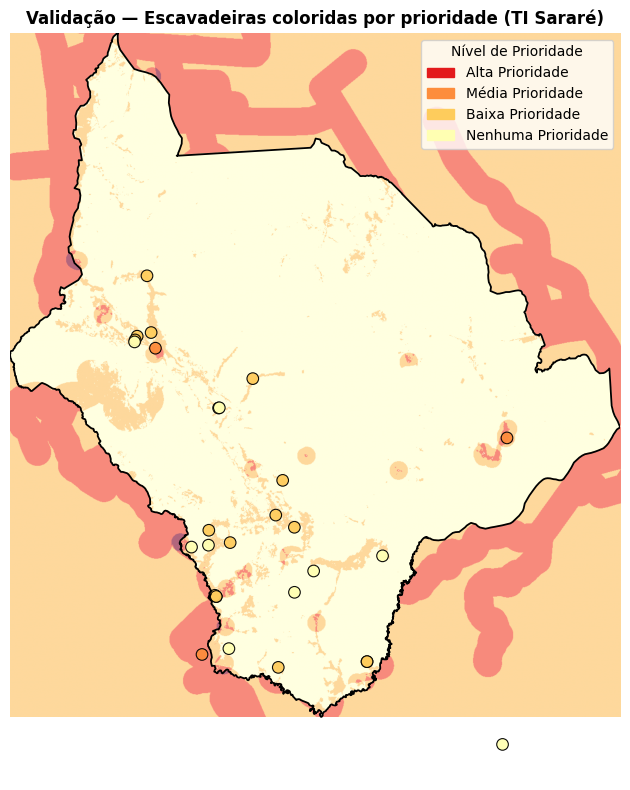

🗺️ Mapa aprimorado exportado com sucesso: D:\WILLIAN\OneDrive\Documentos\5. Estudos\Aplicacoes_Geoespaciais\Analise_SARARE\Validacao_Areas_Interesse_Sarare.png


In [43]:
# ===============================================
# PASSO 6 — VALIDAÇÃO DAS ÁREAS DE INTERESSE
# ===============================================

import os
import geopandas as gpd
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches

# --- Caminhos ---
base_dir = fr"{os.getcwd()}\Analise_SARARE"
path_pcs = fr"{os.getcwd()}\Files\P_Cs\P_Cs_gcs.shp"
path_raster = os.path.join(base_dir, "Mapa_Areas_Interesse_Sarare.tif")
path_ti = fr"{os.getcwd()}\TI_BRASIL\tis_poligonaisPolygon.shp"

NOME_TI = "Sararé"

# --- Carregar TI e shapefile de escavadeiras ---
ti = gpd.read_file(path_ti)
ti_sarare = ti[ti["terrai_nom"] == NOME_TI]
pcs = gpd.read_file(path_pcs)

# --- Garantir que todos estão no mesmo CRS do raster ---
with rasterio.open(path_raster) as src:
    raster_crs = src.crs
    nodata_val = src.nodata
    pcs = pcs.to_crs(raster_crs)
    ti_sarare = ti_sarare.to_crs(raster_crs)

    coords = [(x, y) for x, y in zip(pcs.geometry.x, pcs.geometry.y)]
    valores = [v[0] if v[0] != nodata_val else np.nan for v in src.sample(coords)]

pcs["prioridade"] = valores

# --- Paleta de cores da prioridade ---
cores_prioridade = {
    0: "#FFFFB2",  # amarelo claro - nenhuma
    1: "#FECC5C",  # amarelo médio - baixa
    2: "#FD8D3C",  # laranja - média
    3: "#E31A1C"   # vermelho - alta
}
pcs["cor"] = pcs["prioridade"].map(cores_prioridade)

# --- Estatísticas rápidas ---
tabela = pcs["prioridade"].value_counts(dropna=False).sort_index()
tabela_df = pd.DataFrame({
    "Prioridade": ["0 - Nenhuma", "1 - Baixa", "2 - Média", "3 - Alta"],
    "N_Pontos": [tabela.get(i, 0) for i in range(4)]
})
tabela_df["Percentual (%)"] = (tabela_df["N_Pontos"] / tabela_df["N_Pontos"].sum() * 100).round(1)
print("\n📊 Distribuição dos pontos de escavadeiras:\n")
print(tabela_df.to_string(index=False))

# --- Plotar mapa ---
fig, ax = plt.subplots(figsize=(10, 8))

# Raster mais suave (transparente)
show((rasterio.open(path_raster)), ax=ax, cmap="YlOrRd", alpha=0.6,
     title="Validação — Escavadeiras coloridas por prioridade (TI Sararé)")

# Limite da TI
ti_sarare.boundary.plot(ax=ax, color="black", linewidth=1.3)

# Escavadeiras — mais visíveis
pcs.plot(
    ax=ax,
    color=pcs["cor"],
    markersize=70,
    alpha=0.95,
    edgecolor="black",
    linewidth=0.8,
    label="Escavadeiras (P_Cs)"
)

# Legenda de prioridades
leg_patches = [
    mpatches.Patch(color="#E31A1C", label="Alta Prioridade"),
    mpatches.Patch(color="#FD8D3C", label="Média Prioridade"),
    mpatches.Patch(color="#FECC5C", label="Baixa Prioridade"),
    mpatches.Patch(color="#FFFFB2", label="Nenhuma Prioridade")
]
plt.legend(handles=leg_patches, title="Nível de Prioridade", frameon=True, loc="upper right")

plt.axis("off")
plt.tight_layout()

saida_fig = os.path.join(base_dir, "Validacao_Areas_Interesse_Sarare.png")
plt.savefig(saida_fig, dpi=300, bbox_inches="tight")
plt.show()

print(f"🗺️ Mapa aprimorado exportado com sucesso: {saida_fig}")



### **Conclusão**

A detecção de escavadeiras no interior da Terra Indígena Sararé permanece um grande desafio, sobretudo devido à densa cobertura vegetal e à rápida dinâmica de deslocamento das frentes de garimpo. No entanto, o uso de imagens mais recentes e de alta resolução tem ampliado significativamente a capacidade de análise, permitindo identificar **novas trilhas de acesso, áreas de apoio logístico e pontos estratégicos de entrada** utilizados por garimpeiros.

Destaca-se que, durante esta operação, o **IBAMA**, com **apoio direto e indireto de diversos órgãos federais e estaduais**, obteve resultados expressivos ao **neutralizar 160 retroescavadeiras**, impondo **prejuízo milionário aos infratores** e contribuindo de forma decisiva para a **contenção das atividades ilegais na região da TI Sararé**.
